In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import datetime

In [4]:
import matplotlib.pyplot as plt

# Create example data for demo

In [5]:
def sim_samples(id_sample, n_samples, n_cycles, max_val):
    id_samples_per_cycle = np.floor(n_samples/n_cycles)
    cos_inner = (np.pi * (id_sample % id_samples_per_cycle)) / (id_samples_per_cycle)
    return max_val/2 * (np.cos(cos_inner) + 1)

In [6]:
n_samples = 100
df_demo = pd.DataFrame(columns=['date_time', 'O2val'])
df_demo['date_time'] = pd.period_range(start=datetime.datetime.today(), periods= n_samples, freq='3s').to_timestamp()
df_demo['O2val'] = [sim_samples(i, n_samples, 5, 50) for i in range(n_samples)]

In [7]:
df_demo

,date_time,O2val
0,2023-08-07 20:06:02,50.000000
1,2023-08-07 20:06:05,49.692209
2,2023-08-07 20:06:08,48.776413
3,2023-08-07 20:06:11,47.275163
4,2023-08-07 20:06:14,45.225425
...,...,...
95,2023-08-07 20:10:47,7.322330
96,2023-08-07 20:10:50,4.774575
97,2023-08-07 20:10:53,2.724837
98,2023-08-07 20:10:56,1.223587


In [12]:
df_demo.max()

date_time    2023-08-07 20:10:59
O2val                       50.0
dtype: object

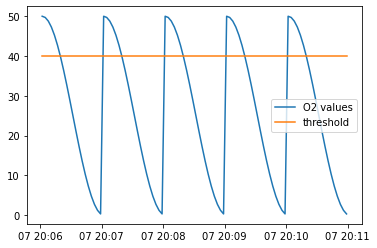

In [8]:
thresh = 40
plt.plot(df_demo['date_time'], df_demo['O2val'], label='O2 values')
plt.plot(df_demo['date_time'], [thresh]*n_samples, label='threshold')
plt.legend()
plt.show()

# For loop 

In [9]:
import csv

In [10]:
alert_on = False
for ind, row in df_demo.iterrows():
    if((row['O2val']) < thresh) & (alert_on == False): # Value dropped just below the threshold
        # generate alert : modify to generate an alert pop-up
        print(f'Generating alert at {row["date_time"]}') 
        
        # log the information that the value has dropped
        with open('log.csv','a') as f1:
            writer = csv.DictWriter(f1, fieldnames= ['date_time','O2_dropped_to'], delimiter='\t',lineterminator='\n')
            writer.writerow({'date_time': row["date_time"], 'O2_dropped_to':row['O2val']})
        
        # Switch on the flag to indicate that alert box has been created
        alert_on = True 
        
    if((row['O2val']) > thresh) & (alert_on == True): # Manual calibration
        # maybe close the alert box
        print(f'Closing alert at {row["date_time"]}') 
        # switch off the flag
        alert_on = False 

Generating alert at 2023-08-07 20:06:20
Closing alert at 2023-08-07 20:07:02
Generating alert at 2023-08-07 20:07:20
Closing alert at 2023-08-07 20:08:02
Generating alert at 2023-08-07 20:08:20
Closing alert at 2023-08-07 20:09:02
Generating alert at 2023-08-07 20:09:20
Closing alert at 2023-08-07 20:10:02
Generating alert at 2023-08-07 20:10:20


# Example implementation

In [21]:
from datetime import date, timedelta

start_dt = date(2021, 12, 10)
end_dt = date(2022, 6, 15)

# difference between current and previous date
delta = timedelta(days=1)

# store the dates between two dates in a list
dates = []

while start_dt <= end_dt:
    # add current date to list by converting  it to iso format
    dates.append(start_dt.isoformat())
    # increment start date by timedelta
    start_dt += delta

print('Dates between', start_dt, 'and', end_dt)
#print(dates)

dates = pd.DataFrame(dates)

dates

Dates between 2022-06-16 and 2022-06-15


,0
0,2021-12-10
1,2021-12-11
2,2021-12-12
3,2021-12-13
4,2021-12-14
...,...
183,2022-06-11
184,2022-06-12
185,2022-06-13
186,2022-06-14


In [28]:
dates[1:22].max()

0    2021-12-31
dtype: object

In [31]:
select_dates = dates[:22]

In [39]:
df_demo = pd.DataFrame(columns=['date_time', 'O2val'])
df_demo['date_time'] = select_dates
df_demo['O2val'] = [sim_samples(i, n_samples, 5, 50) for i in range(22)]

In [40]:
df_demo

,date_time,O2val
0,2021-12-10,50.000000
1,2021-12-11,49.692209
2,2021-12-12,48.776413
3,2021-12-13,47.275163
4,2021-12-14,45.225425
5,2021-12-15,42.677670
6,2021-12-16,39.694631
7,2021-12-17,36.349762
8,2021-12-18,32.725425
9,2021-12-19,28.910862


In [41]:
max_value = df_demo.max()

In [48]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second

In [51]:
import ctypes  # An included library with Python install.   

In [52]:
threshold = 21
alert_on = False
for idx, row in df_demo.iterrows():
    if ((row['O2val'] < thresh) & alert_on == False):
        winsound.Beep(frequency, duration)
        #print(f'Generating alert: {row["date_time"]}')
        ctypes.windll.user32.MessageBoxW(0, "Drifting started!!", "ALert...Alert!!", 1)